# Numerical values

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
df = pd.read_csv('Data.csv')

In [3]:
df.head(2)

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes


In [4]:
df.shape

(10, 4)

In [5]:
df.columns

Index(['Country', 'Age', 'Salary', 'Purchased'], dtype='object')

In [6]:
df.describe()

,Age,Salary
count,8.000000,9.000000
mean,38.875000,63777.777778
std,8.219098,12265.579662
min,27.000000,48000.000000
25%,33.750000,54000.000000
50%,38.500000,61000.000000
75%,45.000000,72000.000000
max,50.000000,83000.000000


In [7]:
np.random.randint(df.Age.min(),df.Age.max(),10)

array([48, 45, 39, 49, 37, 33, 46, 38, 45, 39])

In [8]:
df.Age.max()

50.0

In [9]:
df.columns

Index(['Country', 'Age', 'Salary', 'Purchased'], dtype='object')

In [10]:
df.index.values

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [11]:
df.Age

0    44.0
1    27.0
2    30.0
3     NaN
4    40.0
5    35.0
6     NaN
7    48.0
8    50.0
9    37.0
Name: Age, dtype: float64

In [12]:
df.isna()

,Country,Age,Salary,Purchased
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,True,False,False
4,False,False,True,False
5,False,False,False,False
6,False,True,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [13]:
df['Age'].isna()

0    False
1    False
2    False
3     True
4    False
5    False
6     True
7    False
8    False
9    False
Name: Age, dtype: bool

In [14]:
df[df['Age'].isna()]

,Country,Age,Salary,Purchased
3,Spain,NaN,61000.0,No
6,Spain,NaN,52000.0,No


In [15]:
df.dropna()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
5,France,35.0,58000.0,Yes
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [16]:
df['Age'].isna()

0    False
1    False
2    False
3     True
4    False
5    False
6     True
7    False
8    False
9    False
Name: Age, dtype: bool

In [17]:
df.Age

0    44.0
1    27.0
2    30.0
3     NaN
4    40.0
5    35.0
6     NaN
7    48.0
8    50.0
9    37.0
Name: Age, dtype: float64

### Function for Mean/Median & Arbitrary imputation

In [18]:
def impute_na(df, variable):
    median = df[variable].median()
    df[variable+'_median'] = df[variable].fillna(median)
    mean = df[variable].mean()
    df[variable+'_mean'] = df[variable].fillna(mean)
    df[variable+'_zero'] = df[variable].fillna(0)

In [19]:
median = df.Age.median()
median

38.5

In [20]:
median_sal = df.Salary.median()
median_sal

61000.0

In [21]:
impute_na(df, 'Age')
df

,Country,Age,Salary,Purchased,Age_median,Age_mean,Age_zero
0,France,44.0,72000.0,No,44.0,44.000,44.0
1,Spain,27.0,48000.0,Yes,27.0,27.000,27.0
2,Germany,30.0,54000.0,No,30.0,30.000,30.0
3,Spain,NaN,61000.0,No,38.5,38.875,0.0
4,Germany,40.0,NaN,Yes,40.0,40.000,40.0
5,France,35.0,58000.0,Yes,35.0,35.000,35.0
6,Spain,NaN,52000.0,No,38.5,38.875,0.0
7,France,48.0,79000.0,Yes,48.0,48.000,48.0
8,Germany,50.0,83000.0,No,50.0,50.000,50.0
9,France,37.0,67000.0,Yes,37.0,37.000,37.0


In [22]:
impute_na(df, 'Salary')
df

,Country,Age,Salary,Purchased,Age_median,Age_mean,Age_zero,Salary_median,Salary_mean,Salary_zero
0,France,44.0,72000.0,No,44.0,44.000,44.0,72000.0,72000.000000,72000.0
1,Spain,27.0,48000.0,Yes,27.0,27.000,27.0,48000.0,48000.000000,48000.0
2,Germany,30.0,54000.0,No,30.0,30.000,30.0,54000.0,54000.000000,54000.0
3,Spain,NaN,61000.0,No,38.5,38.875,0.0,61000.0,61000.000000,61000.0
4,Germany,40.0,NaN,Yes,40.0,40.000,40.0,61000.0,63777.777778,0.0
5,France,35.0,58000.0,Yes,35.0,35.000,35.0,58000.0,58000.000000,58000.0
6,Spain,NaN,52000.0,No,38.5,38.875,0.0,52000.0,52000.000000,52000.0
7,France,48.0,79000.0,Yes,48.0,48.000,48.0,79000.0,79000.000000,79000.0
8,Germany,50.0,83000.0,No,50.0,50.000,50.0,83000.0,83000.000000,83000.0
9,France,37.0,67000.0,Yes,37.0,37.000,37.0,67000.0,67000.000000,67000.0


#### The variance should decrease after mean/median imputation

In [24]:
# we can see a change in the variance after imputation

print('Original Variance: ', df['Age'].std()**2)
print('Variance after median imputation: ', df['Age_median'].std()**2)
print('Variance after mean imputation: ', df['Age_mean'].std()**2)

Original Variance:  67.55357142857143
Variance after median imputation:  52.56666666666667
Variance after mean imputation:  52.541666666666664


### Function for Random sample imputation

In [25]:
df.isnull().sum()

Country          0
Age              2
Salary           1
Purchased        0
Age_median       0
Age_mean         0
Age_zero         0
Salary_median    0
Salary_mean      0
Salary_zero      0
dtype: int64

In [26]:
df['Age'].isnull().sum()

2

In [31]:
# let's make a function to create random sampling

def impute_na(df, variable):
    # random sampling
    df[variable+'_random'] = df[variable]
    # extract the random sample to fill the na
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),
                                                random_state=0)
    # pandas needs to have the same index in order to merge datasets
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample

In [32]:
impute_na(df, 'Age')
df

,Country,Age,Salary,Purchased,Age_median,Age_mean,Age_zero,Salary_median,Salary_mean,Salary_zero,Age_random
0,France,44.0,72000.0,No,44.0,44.000,44.0,72000.0,72000.000000,72000.0,44.0
1,Spain,27.0,48000.0,Yes,27.0,27.000,27.0,48000.0,48000.000000,48000.0,27.0
2,Germany,30.0,54000.0,No,30.0,30.000,30.0,54000.0,54000.000000,54000.0,30.0
3,Spain,NaN,61000.0,No,38.5,38.875,0.0,61000.0,61000.000000,61000.0,50.0
4,Germany,40.0,NaN,Yes,40.0,40.000,40.0,61000.0,63777.777778,0.0,40.0
5,France,35.0,58000.0,Yes,35.0,35.000,35.0,58000.0,58000.000000,58000.0,35.0
6,Spain,NaN,52000.0,No,38.5,38.875,0.0,52000.0,52000.000000,52000.0,30.0
7,France,48.0,79000.0,Yes,48.0,48.000,48.0,79000.0,79000.000000,79000.0,48.0
8,Germany,50.0,83000.0,No,50.0,50.000,50.0,83000.0,83000.000000,83000.0,50.0
9,France,37.0,67000.0,Yes,37.0,37.000,37.0,67000.0,67000.000000,67000.0,37.0


#### Function for Extreme value imputation

In [33]:
def impute_na(df, variable):
    extreme_right = df[variable].mean() + 2*df[variable].std()
    extreme_left = df[variable].mean() - 2*df[variable].std()
    df[variable+'_far_right'] = df[variable].fillna(extreme_right)
    df[variable+'_far_left'] = df[variable].fillna(extreme_left)

In [34]:
# let's replace the NA with the extreme value
impute_na(df, 'Age')
df

,Country,Age,Salary,Purchased,Age_median,Age_mean,Age_zero,Salary_median,Salary_mean,Salary_zero,Age_random,Age_far_right,Age_far_left
0,France,44.0,72000.0,No,44.0,44.000,44.0,72000.0,72000.000000,72000.0,44.0,44.000000,44.000000
1,Spain,27.0,48000.0,Yes,27.0,27.000,27.0,48000.0,48000.000000,48000.0,27.0,27.000000,27.000000
2,Germany,30.0,54000.0,No,30.0,30.000,30.0,54000.0,54000.000000,54000.0,30.0,30.000000,30.000000
3,Spain,NaN,61000.0,No,38.5,38.875,0.0,61000.0,61000.000000,61000.0,50.0,55.313196,22.436804
4,Germany,40.0,NaN,Yes,40.0,40.000,40.0,61000.0,63777.777778,0.0,40.0,40.000000,40.000000
5,France,35.0,58000.0,Yes,35.0,35.000,35.0,58000.0,58000.000000,58000.0,35.0,35.000000,35.000000
6,Spain,NaN,52000.0,No,38.5,38.875,0.0,52000.0,52000.000000,52000.0,30.0,55.313196,22.436804
7,France,48.0,79000.0,Yes,48.0,48.000,48.0,79000.0,79000.000000,79000.0,48.0,48.000000,48.000000
8,Germany,50.0,83000.0,No,50.0,50.000,50.0,83000.0,83000.000000,83000.0,50.0,50.000000,50.000000
9,France,37.0,67000.0,Yes,37.0,37.000,37.0,67000.0,67000.000000,67000.0,37.0,37.000000,37.000000


# Catagorical Values

In [36]:
# Importing the dataset
df = pd.read_csv('service.csv')

In [37]:
df.shape

(1745, 14)

In [38]:
df.head()

,asset_nbr,asset_stats,install_dt,modlty_full,custmr_catgry_full,custmr_typ_full,srv_regn_full,divsn_full,warrnty_start_dt,warrnty_end_dt,contract_flag,warrnty_end_mnth,warrnty_flg,inputrowindex
0,ASSET0,Installed,2016-06-15,MODLTY0,NaN,CUSTMR_TYP0,SRV_REGN0,DIVSN0,2016-06-15,2017-06-25,N,201706,Y,1
1,ASSET1,Installed,2016-12-07,MODLTY1,CUSTMR_CATGRY0,CUSTMR_TYP0,SRV_REGN1,DIVSN1,2016-12-07,2017-12-12,Y,201712,Y,2
2,ASSET2,Installed,2016-08-16,MODLTY0,CUSTMR_CATGRY0,CUSTMR_TYP0,SRV_REGN2,DIVSN2,2016-08-16,2017-08-21,N,201708,Y,3
3,ASSET3,Installed,2016-09-22,MODLTY0,CUSTMR_CATGRY1,CUSTMR_TYP0,SRV_REGN0,DIVSN0,2016-09-22,2017-09-27,Y,201709,Y,4
4,ASSET4,Installed,2016-06-24,MODLTY0,CUSTMR_CATGRY1,CUSTMR_TYP0,SRV_REGN3,DIVSN3,2016-06-24,2017-06-29,Y,201706,Y,5


In [39]:
df.isnull().sum()

asset_nbr              0
asset_stats            0
install_dt             0
modlty_full            0
custmr_catgry_full    26
custmr_typ_full        0
srv_regn_full          0
divsn_full             0
warrnty_start_dt       0
warrnty_end_dt         0
contract_flag          0
warrnty_end_mnth       0
warrnty_flg            0
inputrowindex          0
dtype: int64

In [40]:
df['custmr_catgry_full'].unique()

array([nan, 'CUSTMR_CATGRY0', 'CUSTMR_CATGRY1', 'CUSTMR_CATGRY2',
       'CUSTMR_CATGRY3', 'CUSTMR_CATGRY4', 'CUSTMR_CATGRY5',
       'CUSTMR_CATGRY6', 'CUSTMR_CATGRY7', 'CUSTMR_CATGRY8',
       'CUSTMR_CATGRY9', 'CUSTMR_CATGRY10', 'CUSTMR_CATGRY11',
       'CUSTMR_CATGRY12', 'CUSTMR_CATGRY13', 'CUSTMR_CATGRY14',
       'CUSTMR_CATGRY15', 'CUSTMR_CATGRY16', 'CUSTMR_CATGRY17',
       'CUSTMR_CATGRY18', 'CUSTMR_CATGRY19', 'CUSTMR_CATGRY20'],
      dtype=object)

In [41]:
df['custmr_catgry_full'].nunique()

21

In [42]:
df.shape

(1745, 14)

### Frequent Category Imputation

In [43]:
df.groupby(['custmr_catgry_full'])['custmr_catgry_full'].count().sort_values(ascending=False)

custmr_catgry_full
CUSTMR_CATGRY4     571
CUSTMR_CATGRY0     393
CUSTMR_CATGRY1     362
CUSTMR_CATGRY7      78
CUSTMR_CATGRY9      75
CUSTMR_CATGRY2      47
CUSTMR_CATGRY8      35
CUSTMR_CATGRY12     28
CUSTMR_CATGRY14     27
CUSTMR_CATGRY10     23
CUSTMR_CATGRY5      21
CUSTMR_CATGRY6      17
CUSTMR_CATGRY11     11
CUSTMR_CATGRY13      7
CUSTMR_CATGRY3       6
CUSTMR_CATGRY15      6
CUSTMR_CATGRY16      4
CUSTMR_CATGRY18      4
CUSTMR_CATGRY19      2
CUSTMR_CATGRY20      1
CUSTMR_CATGRY17      1
Name: custmr_catgry_full, dtype: int64

<AxesSubplot:xlabel='custmr_catgry_full'>

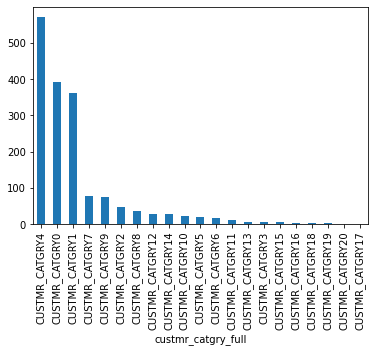

In [44]:
df.groupby(['custmr_catgry_full'])['custmr_catgry_full'].count().sort_values(ascending=False).plot.bar()

In [45]:
# with this command we capture the most frequent label
df.groupby(['custmr_catgry_full'])['custmr_catgry_full'].count().sort_values(ascending=False).index[0]

'CUSTMR_CATGRY4'

In [46]:
# let's create a variable to replace NA with the most frequent label

def impute_na(df, variable):
    most_frequent_category = df.groupby([variable])[variable].count().sort_values(ascending=False).index[0]
    df[variable+ '_most_frequent'] = df[variable].fillna(most_frequent_category)

In [47]:
impute_na(df, 'custmr_catgry_full')
df.head()

,asset_nbr,asset_stats,install_dt,modlty_full,custmr_catgry_full,custmr_typ_full,srv_regn_full,divsn_full,warrnty_start_dt,warrnty_end_dt,contract_flag,warrnty_end_mnth,warrnty_flg,inputrowindex,custmr_catgry_full_most_frequent
0,ASSET0,Installed,2016-06-15,MODLTY0,NaN,CUSTMR_TYP0,SRV_REGN0,DIVSN0,2016-06-15,2017-06-25,N,201706,Y,1,CUSTMR_CATGRY4
1,ASSET1,Installed,2016-12-07,MODLTY1,CUSTMR_CATGRY0,CUSTMR_TYP0,SRV_REGN1,DIVSN1,2016-12-07,2017-12-12,Y,201712,Y,2,CUSTMR_CATGRY0
2,ASSET2,Installed,2016-08-16,MODLTY0,CUSTMR_CATGRY0,CUSTMR_TYP0,SRV_REGN2,DIVSN2,2016-08-16,2017-08-21,N,201708,Y,3,CUSTMR_CATGRY0
3,ASSET3,Installed,2016-09-22,MODLTY0,CUSTMR_CATGRY1,CUSTMR_TYP0,SRV_REGN0,DIVSN0,2016-09-22,2017-09-27,Y,201709,Y,4,CUSTMR_CATGRY1
4,ASSET4,Installed,2016-06-24,MODLTY0,CUSTMR_CATGRY1,CUSTMR_TYP0,SRV_REGN3,DIVSN3,2016-06-24,2017-06-29,Y,201706,Y,5,CUSTMR_CATGRY1


In [48]:
df.isnull().sum()

asset_nbr                            0
asset_stats                          0
install_dt                           0
modlty_full                          0
custmr_catgry_full                  26
custmr_typ_full                      0
srv_regn_full                        0
divsn_full                           0
warrnty_start_dt                     0
warrnty_end_dt                       0
contract_flag                        0
warrnty_end_mnth                     0
warrnty_flg                          0
inputrowindex                        0
custmr_catgry_full_most_frequent     0
dtype: int64

### Random sample imputation

In [49]:
# let's create a variable to replace NA with a random sample

def impute_na(df, variable):
    # random sampling
    df[variable+'_random'] = df[variable]
        
    # extract the random sample to fill the na
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), 
                                                 random_state=0)
    
    # pandas needs to have the same index in order to merge datasets
    random_sample.index = df[df[variable].isnull()].index
    
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample

In [50]:
# let's replace the NA with the random sample
impute_na(df, 'custmr_catgry_full')
df.head()

,asset_nbr,asset_stats,install_dt,modlty_full,custmr_catgry_full,custmr_typ_full,srv_regn_full,divsn_full,warrnty_start_dt,warrnty_end_dt,contract_flag,warrnty_end_mnth,warrnty_flg,inputrowindex,custmr_catgry_full_most_frequent,custmr_catgry_full_random
0,ASSET0,Installed,2016-06-15,MODLTY0,NaN,CUSTMR_TYP0,SRV_REGN0,DIVSN0,2016-06-15,2017-06-25,N,201706,Y,1,CUSTMR_CATGRY4,CUSTMR_CATGRY1
1,ASSET1,Installed,2016-12-07,MODLTY1,CUSTMR_CATGRY0,CUSTMR_TYP0,SRV_REGN1,DIVSN1,2016-12-07,2017-12-12,Y,201712,Y,2,CUSTMR_CATGRY0,CUSTMR_CATGRY0
2,ASSET2,Installed,2016-08-16,MODLTY0,CUSTMR_CATGRY0,CUSTMR_TYP0,SRV_REGN2,DIVSN2,2016-08-16,2017-08-21,N,201708,Y,3,CUSTMR_CATGRY0,CUSTMR_CATGRY0
3,ASSET3,Installed,2016-09-22,MODLTY0,CUSTMR_CATGRY1,CUSTMR_TYP0,SRV_REGN0,DIVSN0,2016-09-22,2017-09-27,Y,201709,Y,4,CUSTMR_CATGRY1,CUSTMR_CATGRY1
4,ASSET4,Installed,2016-06-24,MODLTY0,CUSTMR_CATGRY1,CUSTMR_TYP0,SRV_REGN3,DIVSN3,2016-06-24,2017-06-29,Y,201706,Y,5,CUSTMR_CATGRY1,CUSTMR_CATGRY1


In [51]:
### Adding a variable to capture missing values

In [52]:
# let's create a variable to capture NA to indicate missingness
def impute_na(df, variable):
    # add additional variable to indicate missingness
    df[variable+'_NA'] = np.where(df[variable].isnull(), 1, 0)

In [53]:
# let's check missingness in new variable
impute_na(df, 'custmr_catgry_full')
df.head()

,asset_nbr,asset_stats,install_dt,modlty_full,custmr_catgry_full,custmr_typ_full,srv_regn_full,divsn_full,warrnty_start_dt,warrnty_end_dt,contract_flag,warrnty_end_mnth,warrnty_flg,inputrowindex,custmr_catgry_full_most_frequent,custmr_catgry_full_random,custmr_catgry_full_NA
0,ASSET0,Installed,2016-06-15,MODLTY0,NaN,CUSTMR_TYP0,SRV_REGN0,DIVSN0,2016-06-15,2017-06-25,N,201706,Y,1,CUSTMR_CATGRY4,CUSTMR_CATGRY1,1
1,ASSET1,Installed,2016-12-07,MODLTY1,CUSTMR_CATGRY0,CUSTMR_TYP0,SRV_REGN1,DIVSN1,2016-12-07,2017-12-12,Y,201712,Y,2,CUSTMR_CATGRY0,CUSTMR_CATGRY0,0
2,ASSET2,Installed,2016-08-16,MODLTY0,CUSTMR_CATGRY0,CUSTMR_TYP0,SRV_REGN2,DIVSN2,2016-08-16,2017-08-21,N,201708,Y,3,CUSTMR_CATGRY0,CUSTMR_CATGRY0,0
3,ASSET3,Installed,2016-09-22,MODLTY0,CUSTMR_CATGRY1,CUSTMR_TYP0,SRV_REGN0,DIVSN0,2016-09-22,2017-09-27,Y,201709,Y,4,CUSTMR_CATGRY1,CUSTMR_CATGRY1,0
4,ASSET4,Installed,2016-06-24,MODLTY0,CUSTMR_CATGRY1,CUSTMR_TYP0,SRV_REGN3,DIVSN3,2016-06-24,2017-06-29,Y,201706,Y,5,CUSTMR_CATGRY1,CUSTMR_CATGRY1,0


### Adding a category to capture NA

In [54]:
# let's create a category to replace NA

def impute_na(df, variable):
    df[variable+'_NA'] = np.where(df[variable].isnull(), 'Missing', df[variable])
    #df[variable+'_NA'] = df[variable].fillna('Missing')

In [55]:
# let's check missingness iwith new category
impute_na(df, 'custmr_catgry_full')
df.head()

,asset_nbr,asset_stats,install_dt,modlty_full,custmr_catgry_full,custmr_typ_full,srv_regn_full,divsn_full,warrnty_start_dt,warrnty_end_dt,contract_flag,warrnty_end_mnth,warrnty_flg,inputrowindex,custmr_catgry_full_most_frequent,custmr_catgry_full_random,custmr_catgry_full_NA
0,ASSET0,Installed,2016-06-15,MODLTY0,NaN,CUSTMR_TYP0,SRV_REGN0,DIVSN0,2016-06-15,2017-06-25,N,201706,Y,1,CUSTMR_CATGRY4,CUSTMR_CATGRY1,Missing
1,ASSET1,Installed,2016-12-07,MODLTY1,CUSTMR_CATGRY0,CUSTMR_TYP0,SRV_REGN1,DIVSN1,2016-12-07,2017-12-12,Y,201712,Y,2,CUSTMR_CATGRY0,CUSTMR_CATGRY0,CUSTMR_CATGRY0
2,ASSET2,Installed,2016-08-16,MODLTY0,CUSTMR_CATGRY0,CUSTMR_TYP0,SRV_REGN2,DIVSN2,2016-08-16,2017-08-21,N,201708,Y,3,CUSTMR_CATGRY0,CUSTMR_CATGRY0,CUSTMR_CATGRY0
3,ASSET3,Installed,2016-09-22,MODLTY0,CUSTMR_CATGRY1,CUSTMR_TYP0,SRV_REGN0,DIVSN0,2016-09-22,2017-09-27,Y,201709,Y,4,CUSTMR_CATGRY1,CUSTMR_CATGRY1,CUSTMR_CATGRY1
4,ASSET4,Installed,2016-06-24,MODLTY0,CUSTMR_CATGRY1,CUSTMR_TYP0,SRV_REGN3,DIVSN3,2016-06-24,2017-06-29,Y,201706,Y,5,CUSTMR_CATGRY1,CUSTMR_CATGRY1,CUSTMR_CATGRY1


In [56]:
df.isnull().sum()

asset_nbr                            0
asset_stats                          0
install_dt                           0
modlty_full                          0
custmr_catgry_full                  26
custmr_typ_full                      0
srv_regn_full                        0
divsn_full                           0
warrnty_start_dt                     0
warrnty_end_dt                       0
contract_flag                        0
warrnty_end_mnth                     0
warrnty_flg                          0
inputrowindex                        0
custmr_catgry_full_most_frequent     0
custmr_catgry_full_random            0
custmr_catgry_full_NA                0
dtype: int64

In [57]:
df['custmr_catgry_full_NA'].nunique()

22

In [58]:
df['custmr_catgry_full'].nunique()

21

In [59]:
df[df['custmr_catgry_full'].isnull()][['custmr_catgry_full','custmr_catgry_full_most_frequent','custmr_catgry_full_random']]

,custmr_catgry_full,custmr_catgry_full_most_frequent,custmr_catgry_full_random
0,NaN,CUSTMR_CATGRY4,CUSTMR_CATGRY1
17,NaN,CUSTMR_CATGRY4,CUSTMR_CATGRY5
177,NaN,CUSTMR_CATGRY4,CUSTMR_CATGRY4
213,NaN,CUSTMR_CATGRY4,CUSTMR_CATGRY0
221,NaN,CUSTMR_CATGRY4,CUSTMR_CATGRY4
480,NaN,CUSTMR_CATGRY4,CUSTMR_CATGRY0
512,NaN,CUSTMR_CATGRY4,CUSTMR_CATGRY4
614,NaN,CUSTMR_CATGRY4,CUSTMR_CATGRY1
954,NaN,CUSTMR_CATGRY4,CUSTMR_CATGRY4
1050,NaN,CUSTMR_CATGRY4,CUSTMR_CATGRY0


In [60]:
missing_df = df.isnull().sum()
missing_df

asset_nbr                            0
asset_stats                          0
install_dt                           0
modlty_full                          0
custmr_catgry_full                  26
custmr_typ_full                      0
srv_regn_full                        0
divsn_full                           0
warrnty_start_dt                     0
warrnty_end_dt                       0
contract_flag                        0
warrnty_end_mnth                     0
warrnty_flg                          0
inputrowindex                        0
custmr_catgry_full_most_frequent     0
custmr_catgry_full_random            0
custmr_catgry_full_NA                0
dtype: int64